In [6]:
import pandas as pd
import datetime as dt
import requests, sys, os
import functools
import json
import math
import statistics
import numpy as np
import pytz

sys.path.append(os.getcwd())

from API_Intergration import irradiance_tags
from datetime import timedelta, date, time
from pvlib.clearsky import detect_clearsky
from collections import Counter
from pvlib.solarposition import get_solarposition
from pvlib.tracking import singleaxis
from pvlib.irradiance import get_total_irradiance, get_extra_radiation, erbs, disc

ImportError: cannot import name 'irradiance_tags' from 'API_Intergration' (c:\Users\dpinales\Desktop\Arevbot\API_Intergration.py)

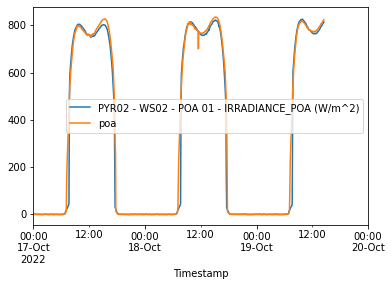

In [30]:
df=pd.read_excel('Historical - Last 3 days_ Oct 17, 2022 - Oct 19, 2022.xlsx')

df.set_index('Timestamp',inplace=True)

df.index = df.index.tz_localize('MST')
lat, lon = 35.943, -114.883

solar_positions = get_solarposition(df.index, lat, lon, 1, method='nrel_numpy')

dni_extra = get_extra_radiation(df.index, epoch_year="2022")


tracking = singleaxis(
    solar_positions['apparent_zenith'], 
    solar_positions['azimuth'], 
    axis_tilt=0,
    axis_azimuth=0,
    max_angle=60,
    gcr=1.4,
    backtrack=False,
)
tracking['surface_tilt'] = tracking['surface_tilt'].fillna(0)
tracking['surface_azimuth'] = tracking['surface_azimuth'].fillna(180)#.replace({xy[0]: xy[1], xy[1]: xy[0]})

tilt = tracking['surface_tilt']
azimuth = tracking['surface_azimuth']


df['tracking_tilt'] = tracking['surface_tilt']
df['tracking_azimuth'] = tracking['surface_azimuth']


if not functools.reduce(lambda x, y: x and y, [x in df.columns for x in ['dni', 'dhi']]):
    comps = erbs(df['PYR01 - WS02 - GHI 01 - IRRADIANCE_GHI (W/m^2)'], solar_positions['zenith'], df.index)
    dni = disc(df['PYR01 - WS02 - GHI 01 - IRRADIANCE_GHI (W/m^2)'], solar_positions['zenith'], df.index)
    comps['dni'] = dni
    df = pd.concat([df, comps], axis=1)


cs = pd.concat([df, solar_positions], axis=1, join='inner')
    
result = get_total_irradiance(
                                tilt, 
                                azimuth, 
                                cs['zenith'], 
                                cs['azimuth'], 
                                cs['dni'], 
                                cs['PYR01 - WS02 - GHI 01 - IRRADIANCE_GHI (W/m^2)'], 
                                cs['dhi'],
                                dni_extra=dni_extra,
                                model="isotropic"
                            )

cs = pd.concat([cs, result], axis=1)

cs.rename({"poa_global": "poa_Calculated"}, axis=1, inplace=True)


cs[{'poa','PYR02 - WS02 - POA 01 - IRRADIANCE_POA (W/m^2)'}].plot()

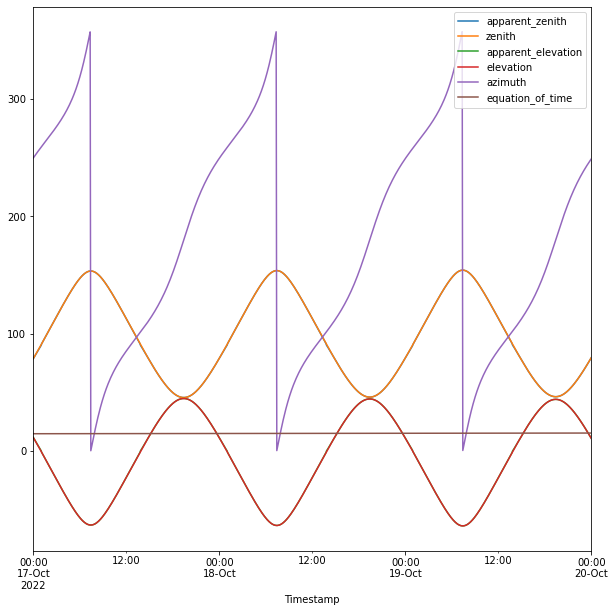

In [17]:
solar_positions.plot(figsize=[10,10])


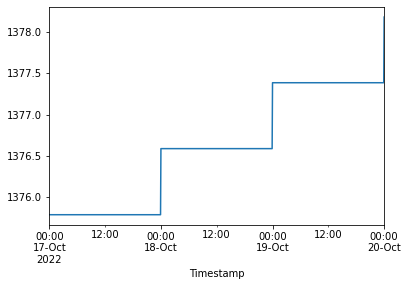

In [19]:
dni_extra.plot()

In [20]:
df

,PYR01 - WS01 - GHI 01 - IRRADIANCE_GHI (W/m^2),PYR01 - WS02 - GHI 01 - IRRADIANCE_GHI (W/m^2),PYR01 - WS03 - GHI 01 - IRRADIANCE_GHI (W/m^2),PYR01 - WS04 - GHI 01 - IRRADIANCE_GHI (W/m^2),PYR01 - WS05 - GHI 01 - IRRADIANCE_GHI (W/m^2),PYR02 - SolarGIS Irradiance GHI Sensor - IRRADIANCE_GHI (W/m^2),tracking_tilt,tracking_azimuth,dni,dhi,kt
Timestamp,,,,,,,,,,,
2022-10-17 00:00:00,0.106059,0.340010,0.303683,1.316635,0.459411,0.0,60.0,270.0,0.0,0.339971,0.001260
2022-10-17 00:05:00,0.011732,-0.023139,-0.154741,0.253017,0.027404,0.0,60.0,270.0,0.0,-0.023139,0.000000
2022-10-17 00:10:00,-0.030000,-0.166253,-0.387517,-0.218994,0.241086,0.0,60.0,270.0,0.0,-0.166253,0.000000
2022-10-17 00:15:00,0.192574,0.121824,-0.133189,0.004430,0.142225,0.0,60.0,270.0,0.0,0.121818,0.000603
2022-10-17 00:20:00,0.278405,0.268336,-0.240598,0.152518,0.172418,0.0,60.0,270.0,0.0,0.268299,0.001500
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19 23:40:00,NaN,NaN,NaN,NaN,NaN,NaN,60.0,270.0,NaN,NaN,NaN
2022-10-19 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,60.0,270.0,NaN,NaN,NaN
2022-10-19 23:50:00,NaN,NaN,NaN,NaN,NaN,NaN,60.0,270.0,NaN,NaN,NaN


In [26]:
df.columns

Index(['PYR01 - WS01 - GHI 01 - IRRADIANCE_GHI (W/m^2)',
       'PYR02 - WS01 - POA 01 - IRRADIANCE_POA (W/m^2)',
       'PYR01 - WS02 - GHI 01 - IRRADIANCE_GHI (W/m^2)',
       'PYR02 - WS02 - POA 01 - IRRADIANCE_POA (W/m^2)',
       'PYR01 - WS03 - GHI 01 - IRRADIANCE_GHI (W/m^2)',
       'PYR02 - WS03 - POA 01 - IRRADIANCE_POA (W/m^2)',
       'PYR01 - WS04 - GHI 01 - IRRADIANCE_GHI (W/m^2)',
       'PYR02 - WS04 - POA 01 - IRRADIANCE_POA (W/m^2)',
       'PYR01 - WS05 - GHI 01 - IRRADIANCE_GHI (W/m^2)',
       'PYR02 - WS05 - POA 01 - IRRADIANCE_POA (W/m^2)',
       'PYR01 - SolarGIS Irradiance POA Sensor - IRRADIANCE_POA (W/m^2)',
       'PYR02 - SolarGIS Irradiance GHI Sensor - IRRADIANCE_GHI (W/m^2)',
       'tracking_tilt', 'tracking_azimuth', 'dni', 'dhi', 'kt'],
      dtype='object')

In [29]:
cs

,PYR01 - WS01 - GHI 01 - IRRADIANCE_GHI (W/m^2),PYR02 - WS01 - POA 01 - IRRADIANCE_POA (W/m^2),PYR01 - WS02 - GHI 01 - IRRADIANCE_GHI (W/m^2),PYR02 - WS02 - POA 01 - IRRADIANCE_POA (W/m^2),PYR01 - WS03 - GHI 01 - IRRADIANCE_GHI (W/m^2),PYR02 - WS03 - POA 01 - IRRADIANCE_POA (W/m^2),PYR01 - WS04 - GHI 01 - IRRADIANCE_GHI (W/m^2),PYR02 - WS04 - POA 01 - IRRADIANCE_POA (W/m^2),PYR01 - WS05 - GHI 01 - IRRADIANCE_GHI (W/m^2),PYR02 - WS05 - POA 01 - IRRADIANCE_POA (W/m^2),...,zenith,apparent_elevation,elevation,azimuth,equation_of_time,poa,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-10-17 00:00:00-07:00,0.106059,NaN,0.340010,0.962741,0.303683,0.317297,1.316635,1.087504,0.459411,0.253725,...,152.730800,-62.730800,-62.730800,346.481044,14.613778,0.340010,-0.0,0.340010,0.340010,0.0
2022-10-17 00:05:00-07:00,0.011732,NaN,-0.023139,0.746326,-0.154741,-0.146341,0.253017,-0.107790,0.027404,-0.191334,...,152.945764,-62.945764,-62.945764,349.142645,14.614490,-0.023139,-0.0,-0.023139,-0.023139,-0.0
2022-10-17 00:10:00-07:00,-0.030000,NaN,-0.166253,0.550000,-0.387517,-0.300000,-0.218994,-0.609870,0.241086,-0.220184,...,153.114265,-63.114265,-63.114265,351.837842,14.615201,-0.166253,-0.0,-0.166253,-0.166253,-0.0
2022-10-17 00:15:00-07:00,0.192574,NaN,0.121824,0.771179,-0.133189,-0.247456,0.004430,-0.530432,0.142225,-0.243702,...,153.235415,-63.235415,-63.235415,354.558897,14.615913,0.121824,-0.0,0.121824,0.121824,0.0
2022-10-17 00:20:00-07:00,0.278405,NaN,0.268336,0.910000,-0.240598,-0.271594,0.152518,-0.394866,0.172418,-0.261100,...,153.308560,-63.308560,-63.308560,357.297531,14.616624,0.268336,-0.0,0.268336,0.268336,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19 23:40:00-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,152.501940,-62.501940,-62.501940,335.809839,15.179303,NaN,-0.0,NaN,NaN,NaN
2022-10-19 23:45:00-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,152.897337,-62.897337,-62.897337,338.348922,15.179905,NaN,-0.0,NaN,NaN,NaN
2022-10-19 23:50:00-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,153.250544,-63.250544,-63.250544,340.950374,15.180506,NaN,-0.0,NaN,NaN,NaN
